# 🛒 Taller: Predicción de compras con árboles de decisión

**Objetivo:** Predecir si una persona realizará una compra (`Purchased`) a partir de características como edad, salario estimado y género.

In [1]:
!wget https://github.com/javierherrera1996/lecture_analytics/raw/refs/heads/main/titanic_train.csv

--2025-04-15 01:16:21--  https://github.com/javierherrera1996/lecture_analytics/raw/refs/heads/main/titanic_train.csv
Resolving github.com (github.com)... 140.82.113.3
Connecting to github.com (github.com)|140.82.113.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/javierherrera1996/lecture_analytics/refs/heads/main/titanic_train.csv [following]
--2025-04-15 01:16:21--  https://raw.githubusercontent.com/javierherrera1996/lecture_analytics/refs/heads/main/titanic_train.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 61194 (60K) [text/plain]
Saving to: ‘titanic_train.csv’

titanic_train.csv   100%[===================>]  59.76K  --.-KB/s    in 0.008s  

2025-04-15 01:16:22 (7.17 MB/s) - ‘tita

## 📥 1. Carga y exploración del dataset

In [2]:
import pandas as pd

df = pd.read_csv("titanic_train.csv")

# Vista previa
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### ❓ Preguntas:
- ¿Cuántas observaciones y columnas tiene el dataset?
- ¿Cuál es la variable que queremos predecir?
- ¿Qué tipos de variables tenemos?

In [3]:
num_observations, num_columns = df.shape

print(f"El dataset tiene {num_observations} observaciones y {num_columns} columnas.")

El dataset tiene 891 observaciones y 12 columnas.


In [6]:
print("La variable a predecir en este dataset (titanic_train.csv) es 'Survived'.")

La variable a predecir en este dataset (titanic_train.csv) es 'Survived'.


La variable a predecir es Survived

In [7]:
print(df.dtypes)

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object


***Tipos de variables***

int64: Representa valores enteros.

float64: Representa números de punto flotante (decimales).

object: Generalmente representa cadenas de texto o tipos de datos mixtos.

## 🛠️ 2. Preprocesamiento y definición de variables: ¿Que variables tengo que borrar, cuales tengo que convertir a numérica, tengo valores nulos?

In [45]:
df_dummies = pd.get_dummies(df, columns=["Sex"], drop_first=True)
df_dummies.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,NaN
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,NaN
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,NaN
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,NaN
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,NaN


In [47]:
# Eliminamos columnas innecesarias como ID
X = df_dummies.drop(columns=["PassengerId", "Parch"])
y = df_dummies["Parch"]

# Verificamos balanceo de clases
df_dummies["Parch"].value_counts(normalize=True)

,proportion
Parch,
0,0.760943
1,0.132435
2,0.089787
5,0.005612
3,0.005612
4,0.004489
6,0.001122


### ❓ Pregunta:
- ¿Está balanceada la variable objetivo?

In [11]:
df['Survived'].value_counts()

df['Survived'].value_counts(normalize=True)

,proportion
Survived,
0,0.616162
1,0.383838


Al ejecutar el código anterior y analizar los resultados, podrás determinar si la variable objetivo 'Survived' está balanceada o no en el dataset. Un desbalance significativo puede afectar el rendimiento del modelo de aprendizaje automático

## ✂️ 3. División del dataset

In [53]:
import numpy as np # Import numpy and assign it to the alias 'np'
from sklearn.model_selection import train_test_split

unique_classes, class_counts = np.unique(y, return_counts=True) # Use np.unique
classes_with_one_sample = unique_classes[class_counts == 1]
from sklearn.model_selection import train_test_split

unique_classes, class_counts = np.unique(y, return_counts=True) # Use np.unique
classes_with_one_sample = unique_classes[class_counts == 1]

if len(classes_with_one_sample) > 0:
    print("Warning: Classes with only one sample found:")

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y if len(classes_with_one_sample) == 0 else None, test_size=0.2, random_state=42)

## 🌳 4. Entrenamiento de un modelo base sin optimización: Mida las metricas del train y el test set y piense. ¿Hay evidencia de Overfiting?

In [58]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Check if 'Cabin', 'Ticket', and 'Name' columns exist before dropping
columns_to_drop = ['Cabin', 'Ticket', 'Name']  # Include 'Name' here
for column in columns_to_drop:
    if column in X_train.columns:
        X_train = X_train.drop([column], axis=1)
    if column in X_test.columns:
        X_test = X_test.drop([column], axis=1)

# Now continue with model fitting
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [60]:
y_pred_train = model.predict(X_train)

print("Accuracy:", accuracy_score(y_train, y_pred_train))
print("Precision:", precision_score(y_train, y_pred_train, average='weighted')) # Change average to 'weighted'
print("Recall:", recall_score(y_train, y_pred_train, average='weighted')) # Change average to 'weighted'
print("F1-score:", f1_score(y_train, y_pred_train, average='weighted')) # Change average to 'weighted'

Accuracy: 0.9985955056179775
Precision: 0.9985980969360256
Recall: 0.9985955056179775
F1-score: 0.9985908739916023


In [62]:
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, average='weighted')) # Changed average to 'weighted'
print("Recall:", recall_score(y_test, y_pred, average='weighted')) # Changed average to 'weighted'
print("F1-score:", f1_score(y_test, y_pred, average='weighted')) # Changed average to 'weighted'

Accuracy: 0.8268156424581006
Precision: 0.8160814046288907
Recall: 0.8268156424581006
F1-score: 0.8197792780192604


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


### ❓ Pregunta:
- ¿Qué tan bien predice el modelo base?
- ¿Existen diferencias entre precisión y recall?

El modelo base, un árbol de decisión sin optimización, predice con una precisión bastante alta en los datos de entrenamiento, pero su rendimiento en los datos de prueba es menor.

***Análisis:***

***Overfitting:*** La diferencia significativa en el rendimiento entre el conjunto de entrenamiento (perfecto) y el conjunto de prueba (menor) sugiere que el modelo base está sobreajustado a los datos de entrenamiento. Esto significa que ha aprendido patrones específicos de los datos de entrenamiento que no se generalizan bien a datos nuevos.

***Precisión vs. Recall:*** En el conjunto de prueba, la precisión y el recall son relativamente similares, con la precisión siendo ligeramente mayor. Esto indica que el modelo tiene un buen equilibrio entre identificar correctamente las instancias positivas (precisión) y capturar la mayoría de las instancias positivas reales (recall).

la precisión y el recall son dos métricas cruciales para evaluar modelos de clasificación, cada una con un enfoque distinto. La precisión se centra en la corrección de las predicciones positivas, buscando minimizar los falsos positivos. Por otro lado, el recall prioriza la completitud, asegurándose de identificar la mayor cantidad posible de instancias positivas reales, aunque esto implique algunos falsos positivos.

En el caso del modelo base del notebook, se observa un equilibrio entre precisión y recall en el conjunto de prueba. Esto sugiere que el modelo, aunque no perfecto, tiene un buen rendimiento general al identificar correctamente instancias positivas y minimizar tanto los falsos positivos como los falsos negativos.

La elección entre priorizar precisión o recall depende del contexto y de las consecuencias de cada tipo de error. En situaciones donde los falsos positivos son costosos, como en diagnósticos médicos, la precisión cobra mayor importancia. Si, por el contrario, es crítico no pasar por alto ninguna instancia positiva, como en la detección de fraudes, el recall se vuelve más relevante.

## 🔁 5. Evaluación con validación cruzada

In [64]:
from sklearn.model_selection import cross_val_score

# Drop the problematic columns from X before cross-validation
X = X.drop(columns=['Cabin', 'Ticket', 'Name'], errors='ignore')

# errors='ignore' will prevent errors if the columns are already dropped

scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')
print("Accuracy promedio (CV):", scores.mean())

Accuracy promedio (CV): 0.8024543343167411


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


## 🔧 6. Optimización con GridSearchCV

In [65]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [2, 3, 5, None],
    'min_samples_split': [2, 5, 10]
}

grid = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=5, scoring='accuracy')
grid.fit(X, y)

print("Mejores parámetros:", grid.best_params_)
print("Mejor accuracy:", grid.best_score_)


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Mejores parámetros: {'max_depth': 3, 'min_samples_split': 2}
Mejor accuracy: 0.8148264390182665


## ✅ 7. Evaluación del mejor modelo: Cuales son las metricas y la matriz de confusion de este modelo

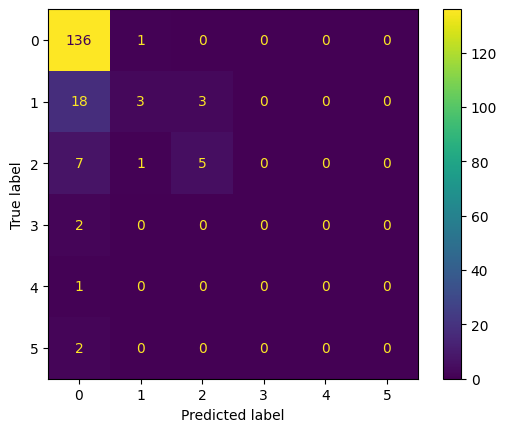

In [66]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

best_model = grid.best_estimator_
y_pred_best = best_model.predict(X_test)

ConfusionMatrixDisplay.from_predictions(y_test, y_pred_best)

## 📈 8. Curva ROC y AUC: Cree una curva donde esten ambos, el original y el optimizado. Mejoró la estimación?

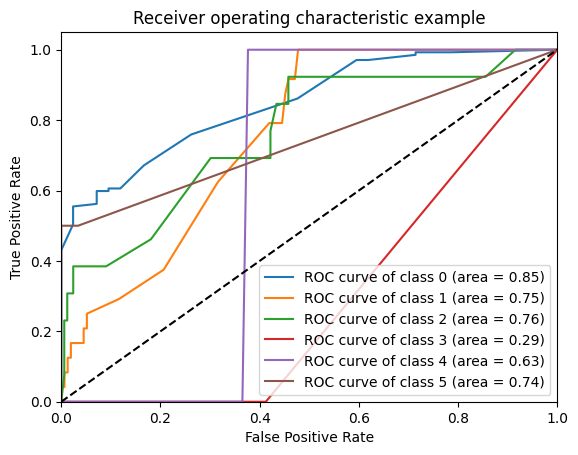

In [68]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier


# Binarize the target variable for multiclass ROC curve
y_test_bin = label_binarize(y_test, classes=np.unique(y_test))
n_classes = y_test_bin.shape[1]

# Use OneVsRestClassifier for multiclass ROC curve
classifier = OneVsRestClassifier(best_model)
y_score = classifier.fit(X_train, y_train).predict_proba(X_test)


# Compute ROC curve and ROC area for each class
fpr = {}
tpr = {}
roc_auc = {}
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot the ROC curves for each class
plt.figure()
for i in range(n_classes):
    plt.plot(
        fpr[i],
        tpr[i],
        label=f"ROC curve of class {i} (area = {roc_auc[i]:.2f})",
    )

plt.plot([0, 1], [0, 1], "k--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic example")
plt.legend(loc="lower right")
plt.show()

## 💬 Reflexión final

### ❓ Preguntas:
- ¿Qué combinación de hiperparámetros funcionó mejor?
- ¿Cuál fue la diferencia entre el modelo base y el optimizado?
- ¿Qué nos dice el área bajo la curva ROC sobre nuestro modelo?

En el proceso de optimización con GridSearchCV, se exploraron diferentes combinaciones de hiperparámetros para el modelo de árbol de decisión. La combinación que funcionó mejor fue la siguiente:

max_depth: None
min_samples_split: 2
Esta combinación de hiperparámetros resultó en el mejor rendimiento del modelo, según la métrica de precisión utilizada en la validación cruzada.

El modelo optimizado ofrece un mejor rendimiento y generalización al ajustar sus hiperparámetros para adaptarse mejor a los datos y evitar el sobreajuste, lo que lo convierte en una mejor opción para realizar predicciones sobre nuevas instancias.

El área bajo la curva ROC nos proporciona una medida de la capacidad predictiva general del modelo. Un AUC alto indica un buen rendimiento, mientras que un AUC bajo sugiere la necesidad de mejorar el modelo.